# ECEC PFAS Presentation - Recreate Figures

### 1) Libraries Import (REQUIRED)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

### 2) Data Import and Export (REQUIRED)

#### Define Functions for Data Import and Export (Required)

In [4]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [5]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")

#### OPTION 1) Import Data from Excel Macro

In [6]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 04-15-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Import Other Data (REQUIRED)

In [88]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

In [12]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 03-25-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [13]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

In [14]:
# Load the Excel file into a DataFrame
df = pd.read_excel("U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/PFAS Toolbox_ColorsPalette.xlsx",sheet_name='ColorPalette_NonTOP')

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df['Database'], df['New_RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df['Abbrev'], df['New_RGB'])}

### PFAS Concentrations at the WRRFs (Section 12 in Toolbox)

#### Functions

In [15]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Type',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [16]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [40]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')
        #ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center', fontsize=tick_label_fontsize)
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Set the legend outside the plot to the right
        ax.legend(title='Sample Type', loc='upper right', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


### By Sample Type

#### Filters and Settings

In [32]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids','Effluent','Influent']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','PFEESA','Perfluoropentanoic acid','HFPO-DA','Perfluoropentanesulfonic acid','Perfluorohexanoic acid',
                        'Perfluorohexanesulfonic acid','Perfluoroheptanoic acid','Perfluoroheptanesulfonic acid','Perfluorooctanoic acid (PFOA)','NMeFOSAA','Perfluorooctanesulfonic acid (PFOS)',
                        'NMeFOSE','6:2 Fluorotelomersulfonic acid','NEtFOSAA','NEtFOSE','Perfluorooctanesulfonamide','Perfluorononanoic acid','Perfluorodecanoic acid',
                        'Perfluorodecanesulfonic acid','Perfluoroundecanoic acid','Perfluorododecanoic acid','Perfluorododecanesulfonic acid','Perfluorotridecanoic acid','Perfluorotetradecanoic acid',
                        'Perfluorohexadecanoic acid','Perfluorooctadecanoic acid']

#### Create Pivot Table for Avg Concentrations

In [33]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
Avg_Pivot= Avg_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
               'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
Avg_Pivot=Avg_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA': '5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
Avg_Pivot

KeyError: "['5:3FTCA'] not in index"

#### Create Pivot Table for Standard Deviation

In [34]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)
std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
               'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
std_Pivot=std_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA': '5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
std_Pivot

KeyError: "['5:3FTCA'] not in index"

#### Create Pivot Table for Count of Samples

In [35]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=None, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
               'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
count_Pivot=count_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA': '5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
count_Pivot

KeyError: "['5:3FTCA'] not in index"

#### Create Pivot Table for Sampling Error

In [36]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)

#error_Pivot=error_Pivot.loc[['PFBA','PFBS','PFEESA','PFPeA','HFPO-DA','PFPeS','PFHxA','PFHxS','PFHpA','PFHpS','PFOA','NMeFOSAA','PFOS','NMeFOSE','6:2FTS','NEtFOSAA',
             #  'NEtFOSE','FOSA','5:3FTCA','PFNA','PFDA','PFDS','PFUnA','PFDoA','PFDoS','PFTrDA','PFTeDA']]
error_Pivot=error_Pivot.rename(index={'PFBA': 'PFBA (4C)',
                        'PFBS': 'PFBS (4C)',
                        'PFEESA': 'PFEESA (4C)',
                        'PFPeA': 'PFPeA (5C)',
                        'HFPO-DA': 'HFPO-DA (5C)',
                        'PFPeS': 'PFPeS (5C)',
                        'PFHxA': 'PFHxA (6C)',
                        'PFHxS': 'PFHxS (6C)',
                        'PFHpA': 'PFHpA (7C)', 
                        'PFHpS': 'PFHpS (7C)',
                        'PFOA': 'PFOA (8C)',
                        'NMeFOSAA': 'NMeFOSAA (8C)',
                        'PFOS': 'PFOS (8C)',
                        'NMeFOSE': 'NMeFOSE (8C)',
                        '6:2FTS': '6:2FTS (8C)',
                        'NEtFOSAA': 'NEtFOSAA (8C)',
                        'NEtFOSE': 'NEtFOSE (8C)',
                        'FOSA': 'FOSA (8C)',
                        '5:3FTCA': '5:3FTCA (8C)',
                        'PFNA': 'PFNA (9C)',
                        'PFDA': 'PFDA (10C)',
                        'PFDS': 'PFDS (10C)',
                        'PFUnA':'PFUnA (11C)',
                        'PFDoA':'PFDoA (12C)',
                        'PFDoS': 'PFDoS (12C)',
                        'PFTrDA':'PFTrDA (13C)',
                        'PFTeDA':'PFTeDA (14C)'})
error_Pivot

Type,Biosolids,Effluent,Influent
PFAS Compound,,,
6:2FTS (8C),0.362745,0.379151,0.651531
HFPO-DA (5C),0.261639,0.257689,0.204455
NEtFOSAA (8C),0.268562,0.258911,0.307186
NEtFOSE (8C),0.317838,0.211150,0.286815
NMeFOSAA (8C),0.898220,0.389021,0.142873
NMeFOSE (8C),0.671370,0.211150,0.282838
PFEESA (4C),0.327503,0.169129,0.229603
PFBS (4C),0.219795,1.063557,1.275681
PFBA (4C),0.445250,1.697323,1.642186


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

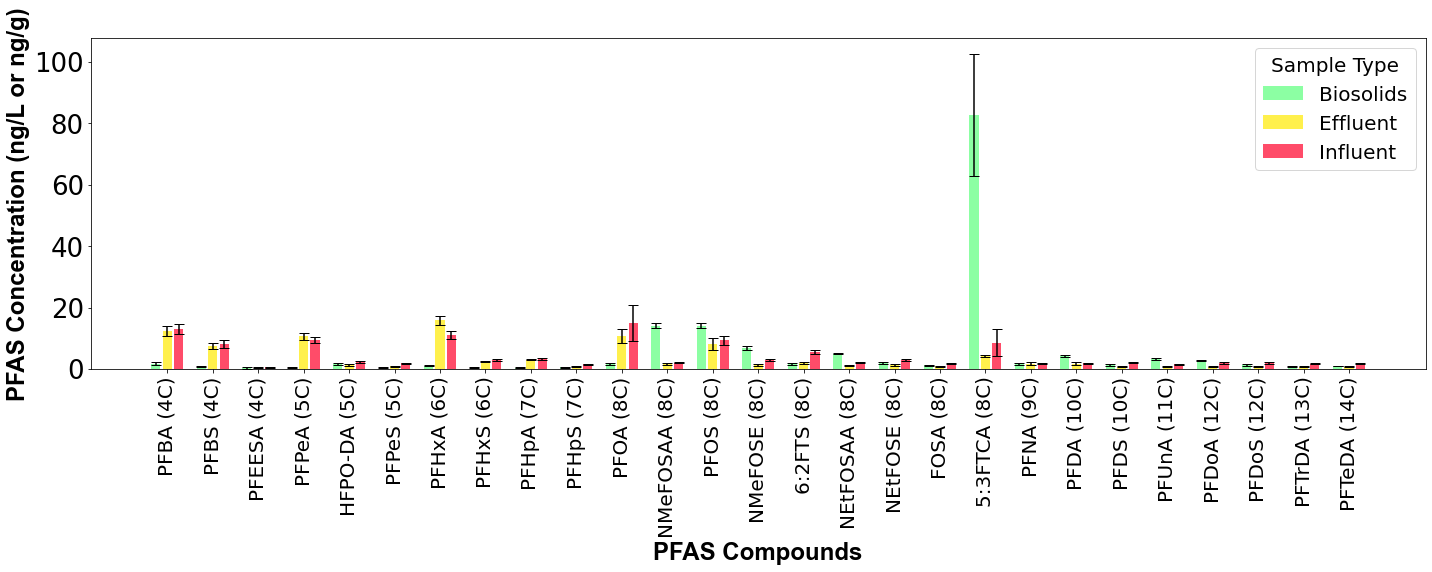

In [140]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Biosolids': (0.5, 1.0, 0.6, .9),
    'Influent': (1.0, 0.0, 0.16, .7),
    'Effluent': (1.0, 0.918918918918919, 0.0, .7)
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='PFAS Concentration (ng/L or ng/g)', figsize=(20,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20)

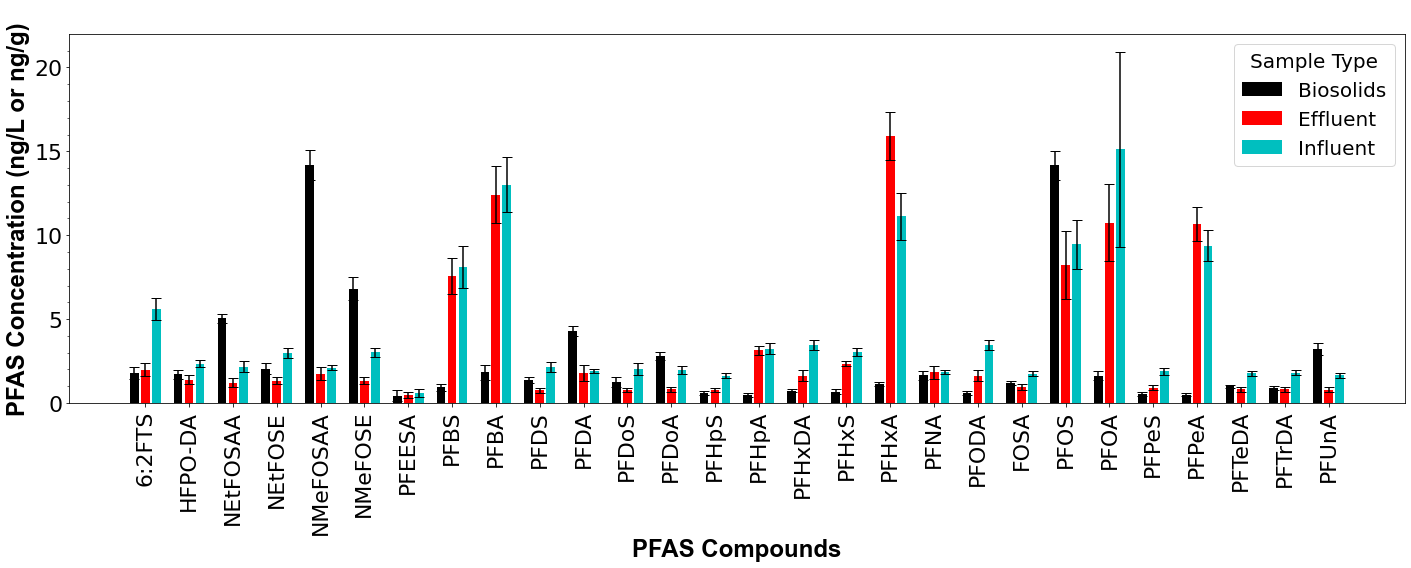

In [41]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Biosolids': 'black',
    'Influent': '#00BFBF',
    'Effluent': 'red'
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='PFAS Concentration (ng/L or ng/g)', figsize=(20,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20)

### Effluent By Sample Location (WRRFs)

#### Functions

In [45]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [46]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [47]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.1  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=90, ha='center')

        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        ax.legend( loc='upper center', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### Filters and Settings

In [48]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Effluent','Forest Grove Effluent','Hillsboro Effluent','Rock Creek Effluent','']
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Effluent']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid','Perfluorohexanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluoroheptanoic acid','6:2 Fluorotelomersulfonic acid','NEtFOSAA','Perfluorooctanoic acid (PFOA)','Perfluorooctanesulfonic acid (PFOS)',
                        'Perfluorononanoic acid','Perfluorodecanoic acid']

#### Create Pivot Table for Avg Concentrations

In [49]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)
Avg_Pivot=Avg_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
Avg_Pivot=Avg_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})
Avg_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),7.153846,5.733333,6.650000,24.142857
PFBS (4C),4.492308,4.715000,5.350000,13.807143
PFPeA (5C),9.030769,6.611111,5.233333,17.171429
PFHxA (6C),12.630769,14.411111,7.983333,23.764286
PFHxS (6C),2.038462,1.695000,2.000000,3.264286
PFHpA (7C),2.392308,1.800000,2.150000,5.185714
6:2FTS (8C),0.987727,2.471875,1.330000,2.365000
NEtFOSAA (8C),0.880385,0.793889,1.018333,1.935769
PFOA (8C),20.038462,4.466667,4.550000,9.764286


#### Create Pivot Table for Standard Deviation

In [50]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot=std_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
std_Pivot=std_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

std_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),2.022628,4.132796,2.698703,13.404116
PFBS (4C),1.865682,2.579104,1.212848,9.745963
PFPeA (5C),2.532912,1.705465,1.413742,8.407179
PFHxA (6C),3.076899,6.408675,3.660282,12.307947
PFHxS (6C),0.704200,0.934893,0.554977,1.379859
PFHpA (7C),0.415254,0.430116,0.441588,2.287376
6:2FTS (8C),0.593420,3.513683,0.671379,1.548099
NEtFOSAA (8C),1.005670,0.973851,1.148802,2.613526
PFOA (8C),25.306967,1.274755,1.182793,4.899389


#### Create Pivot Table for Count of Samples

In [51]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=None, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)


count_Pivot=count_Pivot.loc[['PFBA','PFBS','PFPeA','PFHxA','PFHxS','PFHpA','6:2FTS','NEtFOSAA','PFOA','PFOS',
               'PFNA','PFDA']]
count_Pivot=count_Pivot.rename(index={'PFBA':'PFBA (4C)',
                                  'PFBS': 'PFBS (4C)',
                                  'PFPeA': 'PFPeA (5C)',
                                  'PFHxA': 'PFHxA (6C)',
                                  'PFHxS': 'PFHxS (6C)',
                                  'PFHpA': 'PFHpA (7C)',
                                  '6:2FTS': '6:2FTS (8C)',
                                  'NEtFOSAA': 'NEtFOSAA (8C)',
                                  'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)',
                                  'PFNA': 'PFNA (9C)',
                                  'PFDA':'PFDA (10C)'})

count_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),13,9,6,14
PFBS (4C),13,9,6,14
PFPeA (5C),13,9,6,14
PFHxA (6C),13,9,6,14
PFHxS (6C),13,9,6,14
PFHpA (7C),13,9,6,14
6:2FTS (8C),11,8,5,12
NEtFOSAA (8C),13,9,6,13
PFOA (8C),13,9,6,14


#### Create Pivot Table for Sampling Error

In [52]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Effluent,Forest Grove Effluent,Hillsboro Effluent,Rock Creek Effluent
PFAS Compound,,,,
PFBA (4C),0.560976,1.377599,1.101741,3.582401
PFBS (4C),0.517447,0.859701,0.495143,2.604718
PFPeA (5C),0.702503,0.568488,0.577158,2.246913
PFHxA (6C),0.853378,2.136225,1.494304,3.289437
PFHxS (6C),0.195310,0.311631,0.226569,0.368783
PFHpA (7C),0.115171,0.143372,0.180278,0.611327
6:2FTS (8C),0.178923,1.242275,0.300250,0.446898
NEtFOSAA (8C),0.278923,0.324617,0.468997,0.724862
PFOA (8C),7.018890,0.424918,0.482873,1.309417


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [53]:
## Add Nationwide data
Avg_Pivot['Nationwide Average']=[11,8,88,50,7,23,23,6,69,83,8,5]  
Avg_Pivot['Nationwide Average of No Industries']=[9,6,38,31,5,9,28,3,51,34,7,5]  

error_Pivot['Nationwide Average']=[1.5,1.49,51.2,15.8,.859,11.2,10.9,2,19.7,39.8,1.57,1.21]  
error_Pivot['Nationwide Average of No Industries']=[1.41,1.24,13.3,4.31,.539,1.84,15.8,.492,10.7, 9,.973,1.38]  

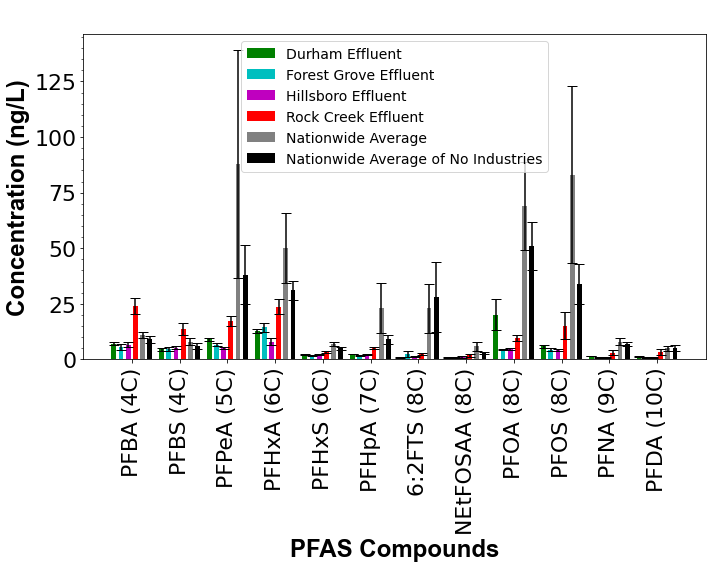

In [54]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Effluent': '#008000',
    'Forest Grove Effluent': '#00BFBF',
    'Rock Creek Effluent': '#FF0000',
    'Hillsboro Effluent' : '#BF00BF',
    'Nationwide Average': 'grey',
    'Nationwide Average of No Industries': 'black'
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(10,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### Biosolids by Plant

#### Functions

In [213]:
def create_pivot_table_from_dataframe(data_df, filter_qual_summary=None, filter_sample_location=None, filter_type=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a pivot table from a given DataFrame with specified filters and calculate the specified aggregation function
    for each PFAS Compound and Type.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').
            Supported values: 'mean', 'count', 'std' (standard deviation), 'sum', 'min', 'max', 'median'.

    Returns:
        pd.DataFrame: The pivot table with specified aggregation function applied to the values.
    """
    try:
        # Apply filters based on specified columns
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        if filter_sample_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'Type' as columns, 'PFAS Compound' as rows, and specified aggregation function as values
        pivot_table = pd.pivot_table(filtered_data, values='All (w BDL= MDL/2) Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [214]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [226]:
def create_grouped_bar_chart_with_errors(avg_pivot_table, error_pivot_table, title=None, ylabel=None, figsize=None, colors=None,
                                         title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a grouped bar chart from a pivot table with rows as groups and columns as subgroups, including error bars.

    Args:
        avg_pivot_table (pd.DataFrame): The pivot table containing average data.
        error_pivot_table (pd.DataFrame): The pivot table containing error data (standard deviations).
        title (str, optional): The title for the chart.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): A tuple (width, height) specifying the figure size.
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        font_bold = FontProperties(family='Arial', weight='bold')

        # Create a grouped bar chart with error bars
        fig, ax = plt.subplots(figsize=figsize or (10, 6))
        subgroups = avg_pivot_table.columns
        group_indices =  np.arange(len(avg_pivot_table))
        bar_width = 0.2  # Width of each bar within a group
        gap = 0.05  # Gap between each group

        for i, subgroup in enumerate(subgroups):
            x = group_indices + i * (bar_width + gap)
            avg_values = avg_pivot_table[subgroup]
            error_values = error_pivot_table[subgroup]
            bar_color = colors.get(subgroup, 'grey')  # Default color if not specified

            ax.bar(x, avg_values, width=bar_width, color=bar_color, label=subgroup, yerr=error_values, capsize=5)

        # Customize the chart labels and legend
        # convert y-axis to Logarithmic scale
        plt.yscale("log") #comment out for first plot. This is only for the Biosolids plot
        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title or 'Grouped Bar Chart of Average Concentrations with Error Bars', fontsize=title_fontsize, fontproperties=font_bold)
        ax.set_xticks(group_indices + (len(subgroups) - 1) * (bar_width + gap) / 2)
        ax.set_xticklabels(avg_pivot_table.index, rotation=0, ha='center')
        # Add minor ticks on the y-axis
        ax.yaxis.set_minor_locator(AutoMinorLocator())

        # Set the legend outside the plot to the right
        ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.7),fontsize=legend_fontsize, title_fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

#### Filters and Settings

In [216]:
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','', 'Probably okay','Probably ok']
#filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Durham Biosolids','Rock Creek Biosolids']
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type = ['Biosolids']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound = ['Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)']

#### Create Pivot Table for Avg Concentrations

In [217]:
Avg_Pivot =create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='mean')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
Avg_Pivot.index = Avg_Pivot.index.map(pfas_mapping)

Avg_Pivot=Avg_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
Avg_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),12.445455,15.500000
PFOA (8C),1.970455,1.374643


#### Create Pivot Table for Standard Deviation

In [219]:
std_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='std')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
std_Pivot.index = std_Pivot.index.map(pfas_mapping)

std_Pivot=std_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})

std_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),3.096244,4.719029
PFOA (8C),2.040175,0.579663


#### Create Pivot Table for Count of Samples

In [220]:
count_Pivot = create_pivot_table_from_dataframe(data_df, filter_qual_summary=filter_qual_summary, filter_sample_location=filter_sample_location, filter_type=filter_type, filter_pfas_compound=filter_pfas_compound,aggfunc='count')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))
# Rename the index of data_df using the mapping (No need to change)
count_Pivot.index = count_Pivot.index.map(pfas_mapping)

count_Pivot=count_Pivot.rename(index={'PFOA': 'PFOA (8C)',
                                  'PFOS': 'PFOS (8C)'})
count_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),11,14
PFOA (8C),11,14


#### Create Pivot Table for Sampling Error

In [221]:
average_pivot=Avg_Pivot
std_dev_pivot = std_Pivot
count_pivot=count_Pivot
error_Pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
error_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids
PFAS Compound,,
PFOS (8C),0.933553,1.261213
PFOA (8C),0.615136,0.154922


#### Create Bar Chart for Avg PFAS Concentrations Using Type as Subgroup

In [222]:
## Add Nationwide data
Avg_Pivot['Nationwide Average']=[233,24]  
Avg_Pivot['Nationwide Average of No Industries']=[167,15]  

error_Pivot['Nationwide Average']=[107,7]  
error_Pivot['Nationwide Average of No Industries']=[92,4.3] 

In [224]:
Avg_Pivot

Sample Location,Durham Biosolids,Rock Creek Biosolids,Nationwide Average,Nationwide Average of No Industries
PFAS Compound,,,,
PFOS (8C),12.445455,15.500000,233,167
PFOA (8C),1.970455,1.374643,24,15


In [225]:
error_pivot_table

Sample Location,Durham Biosolids,Rock Creek Biosolids,Nationwide Average,Nationwide Average of No Industries
PFAS Compound,,,,
PFOS (8C),0.933553,1.261213,107,92.0
PFOA (8C),0.615136,0.154922,7,4.3


<ipython-input-226-991b3b627e3e>:49: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
C:\Users\rodriguezc\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


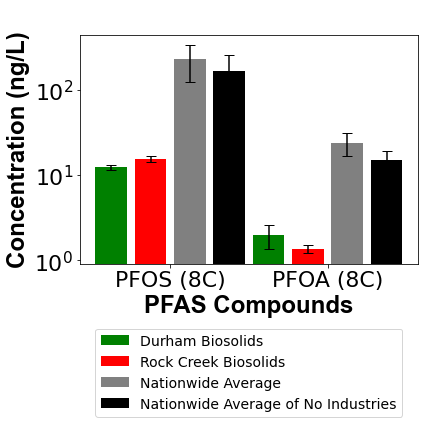

In [227]:
avg_pivot_table=Avg_Pivot
error_pivot_table=error_Pivot

colors = {
    'Durham Biosolids': '#008000',
    'Rock Creek Biosolids': '#FF0000',
    'Nationwide Average': 'grey',
    'Nationwide Average of No Industries': 'black'
}

create_grouped_bar_chart_with_errors(avg_pivot_table=avg_pivot_table, error_pivot_table=error_pivot_table,title=' ',colors=colors, ylabel='Concentration (ng/L)', figsize=(6,8),
                                         title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=14)

### PFAS Concentration by Wet Industry (Section 14)

#### Functions

In [75]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None, aggfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sector',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [76]:
def calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot):
    """
    Calculate error values for each column in the average pivot table using standard deviation and count.

    Args:
        average_pivot (pd.DataFrame): Pivot table with average values.
        std_dev_pivot (pd.DataFrame): Pivot table with standard deviation values.
        count_pivot (pd.DataFrame): Pivot table with count values.

    Returns:
        pd.DataFrame: A new pivot table with error values for each column in the average pivot.
    """
    try:
        # Calculate error by dividing standard deviation by the square root of count
        error_pivot = std_dev_pivot / np.sqrt(count_pivot)

        return error_pivot

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [90]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label, max_length=16):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=7, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()


#### Filters and Settings

In [78]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Chemicals','Electrical and Electronic Components','Industrial Launderers','Metal Finishing','Paper Products','Rubber Manufacture']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['5:3 FTCA','6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
                       'Perfluorodecanoic acid','Perfluorododecanoic acid','Perfluoroheptanoic acid','Perfluorohexanoic acid',
                       'Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                       'Perfluoropentanoic acid']

#### 14.3) Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [79]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

average_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,0.000000,17.000000,0.000,600.000000
PFBA,0.00,100.114706,1.233333,1094.075758,0.000,82.300000
PFPeA,2.20,51.322000,0.483333,921.225714,23.400,98.275000
PFHxA,2.27,38.476774,2.514286,738.405714,34.720,608.875000
PFHpA,0.95,20.663143,0.684286,387.292647,10.880,111.817500
PFOA,2.00,15.870286,3.471429,303.057778,3.140,207.250000
PFNA,0.00,8.060857,1.385714,176.013056,0.112,27.285714
PFDA,0.00,4.910000,0.595714,95.191429,0.000,50.250000
PFDoA,0.00,1.131143,1.217143,14.866970,0.000,6.342857


#### 14.3) Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [80]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

std_dev_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,0.000000,29.444864,NaN,523.259018
PFBA,0.000000,161.940887,2.012627,4674.106640,0.000000,57.659026
PFPeA,3.111270,81.007750,0.780812,4016.606250,25.880495,58.912326
PFHxA,2.022325,55.632491,2.320509,2744.943143,64.630465,407.022441
PFHpA,1.343503,32.923443,1.000697,1503.761244,9.713753,74.623881
PFOA,1.131371,21.884350,3.025290,886.488064,2.885827,166.537641
PFNA,0.000000,12.684789,1.066815,601.279831,0.250440,16.780090
PFDA,0.000000,7.837934,0.774249,284.749694,0.000000,25.572027
PFDoA,0.000000,1.779162,1.954096,40.472701,0.000000,2.970329


#### 14.4) Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [81]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

count_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,9,2,3,1,2
PFBA,2.0,34,6,33,4,7
PFPeA,2.0,35,6,35,5,8
PFHxA,2.0,31,7,35,5,8
PFHpA,2.0,35,7,34,5,8
PFOA,2.0,35,7,36,5,8
PFNA,2.0,35,7,36,5,7
PFDA,2.0,35,7,35,6,8
PFDoA,2.0,35,7,33,5,7


#### 14.4) Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [82]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sector,Chemicals,Electrical and Electronic Components,Industrial Launderers,Metal Finishing,Paper Products,Rubber Manufacture
PFAS Compound,,,,,,
5:3FTCA,NaN,0.000000,0.000000,17.000000,NaN,370.000000
PFBA,0.00,27.772633,0.821651,813.657528,0.000000,21.793064
PFPeA,2.20,13.692809,0.318765,678.930372,11.574109,20.828653
PFHxA,1.43,9.991890,0.877070,463.980075,28.903623,143.904164
PFHpA,0.95,5.565078,0.378228,257.892926,4.344122,26.383526
PFOA,0.80,3.699130,1.143452,147.748011,1.290581,58.879947
PFNA,0.00,2.144121,0.403218,100.213305,0.112000,6.342278
PFDA,0.00,1.324853,0.292639,48.131483,0.000000,9.041077
PFDoA,0.00,0.300733,0.738579,7.045393,0.000000,1.122679


#### 14.5) Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

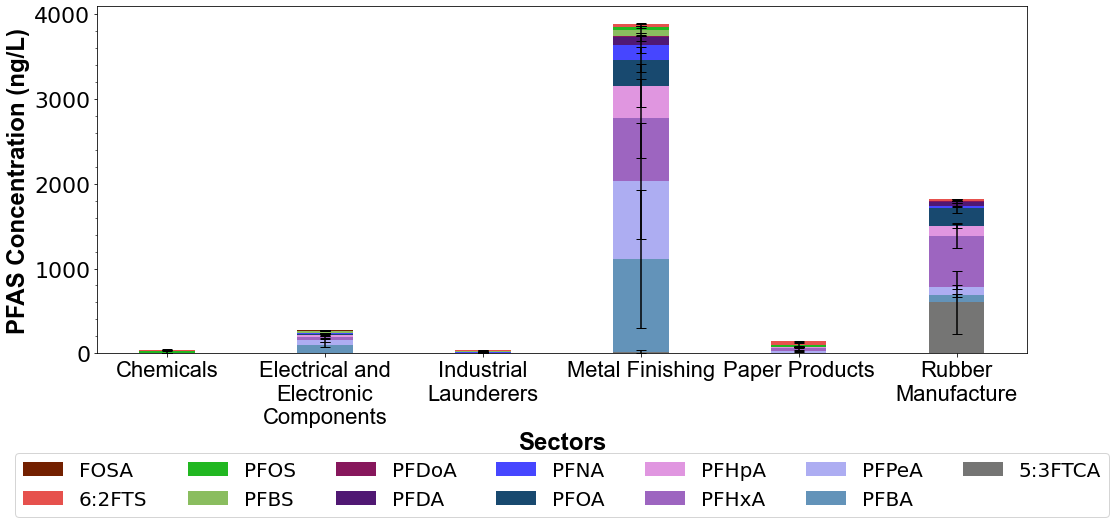

In [91]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)



### PFAS Concentration in the Electronic Sector

#### Functions

In [93]:
def create_custom_pivot(data_df, filter_type=None, filter_qual_summary=None, filter_sector=None, filter_pfas_compound=None,filter_location=None, aggfunc='mean'):
    """
    Create a custom pivot table with filters based on 'Type', 'Qual Summary (Grade for filtering)',
    'Sector', and 'PFAS Compound', averaging 'Quant Incl Estimates Incl Qual Flags'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        aggfunc (str, optional): The aggregation function to apply to the values in the pivot table (default is 'mean').

    Returns:
        pd.DataFrame: The custom pivot table with average values.
    """
    try:
        # Apply filters based on 'Type'
        filtered_data = data_df
        if filter_type:
            filtered_data = filtered_data[filtered_data['Type'].isin(filter_type)]

        # Apply filters based on 'Qual Summary (Grade for filtering)'
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'Sector'
        if filter_sector:
            filtered_data = filtered_data[filtered_data['Sector'].isin(filter_sector)]

        # Apply filters based on 'Sector'
        if filter_location:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_location)]

        # Apply filters based on 'PFAS Compound'
        if filter_pfas_compound:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Create a pivot table with 'PFAS Compound' as rows, 'Sector' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values='Quant Incl Estimates Incl Qual Flags',
                                     index='PFAS Compound', columns='Sample Location',
                                     aggfunc=aggfunc, fill_value=np.nan)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [101]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')

    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]

    def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 16th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label

    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Filters and Settings

In [95]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Electrical and Electronic Components']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluorododecanoic acid',
                       'Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                       'Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
filter_location= ['Intel Aloha F15','Intel Ronler PAWN','Intel Ronler WATR','Jireh Semiconductor Inc','Maxim (Analog)','OSRAM Opto Inc']

#### Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [96]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

# Dictionary mapping old column names to new names
rename_dict = {
    'Intel Aloha F15': 'Electronic Components A',
    'Intel Ronler PAWN': 'Electronic Components B',
    'Intel Ronler WATR': 'Electronic Components C',
    'Jireh Semiconductor Inc' : 'Electronic Components D',
    'Maxim (Analog)': 'Electronic Components E',
    'OSRAM Opto Inc': 'Electronic Components F'
}

# Rename the columns
average_pivot.rename(columns=rename_dict, inplace=True)

average_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,0.575,2.900000,24.757143,357.500000,49.714286,0.0
PFPeA,0.406,0.277143,13.900000,191.250000,23.571429,0.0
PFHxA,0.800,1.476000,12.480000,125.000000,17.000000,0.0
PFHpA,0.118,0.115714,3.601429,77.125000,11.371429,0.0
PFOA,0.196,0.141429,2.355714,52.875000,16.285714,0.0
PFNA,0.048,0.041429,1.214286,29.500000,5.300000,0.0
PFDA,0.000,0.050000,0.542857,17.875000,3.528571,0.0
PFDoA,0.000,0.000000,0.157143,3.737500,1.227143,0.0
PFBS,0.664,0.691429,33.846667,50.112500,40.671429,0.0


#### Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [97]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

# Rename the columns
std_dev_pivot.rename(columns=rename_dict, inplace=True)

std_dev_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E
PFAS Compound,,,,,
PFBA,1.150000,3.818377,64.057887,139.258239,16.519829
PFPeA,0.653207,0.351222,35.330770,37.201190,6.704654
PFHxA,1.262161,2.298071,27.130278,33.273756,5.859465
PFHpA,0.263856,0.306151,8.999445,19.253478,4.731002
PFOA,0.438269,0.261816,6.019335,8.592979,4.111540
PFNA,0.107331,0.109610,3.212698,7.425824,4.617359
PFDA,0.000000,0.132288,1.436265,5.221863,3.737073
PFDoA,0.000000,0.000000,0.415761,1.788006,1.042828
PFBS,1.313195,0.967754,76.506650,47.993316,63.818668


####  Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [98]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

# Rename the columns
count_pivot.rename(columns=rename_dict, inplace=True)

count_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,4,7,7,8,7,1
PFPeA,5,7,7,8,7,1
PFHxA,5,5,5,8,7,1
PFHpA,5,7,7,8,7,1
PFOA,5,7,7,8,7,1
PFNA,5,7,7,8,7,1
PFDA,5,7,7,8,7,1
PFDoA,5,7,7,8,7,1
PFBS,5,7,6,8,7,1


#### Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [99]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sample Location,Electronic Components A,Electronic Components B,Electronic Components C,Electronic Components D,Electronic Components E,Electronic Components F
PFAS Compound,,,,,,
PFBA,0.575000,1.443211,24.211605,49.235223,6.243909,NaN
PFPeA,0.292123,0.132750,13.353776,13.152607,2.534121,NaN
PFHxA,0.564455,1.027729,12.133029,11.764049,2.214670,NaN
PFHpA,0.118000,0.115714,3.401471,6.807133,1.788151,NaN
PFOA,0.196000,0.098957,2.275095,3.038077,1.554016,NaN
PFNA,0.048000,0.041429,1.214286,2.625425,1.745197,NaN
PFDA,0.000000,0.050000,0.542857,1.846208,1.412481,NaN
PFDoA,0.000000,0.000000,0.157143,0.632155,0.394152,NaN
PFBS,0.587278,0.365777,31.233709,16.968200,24.121189,NaN


#### Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


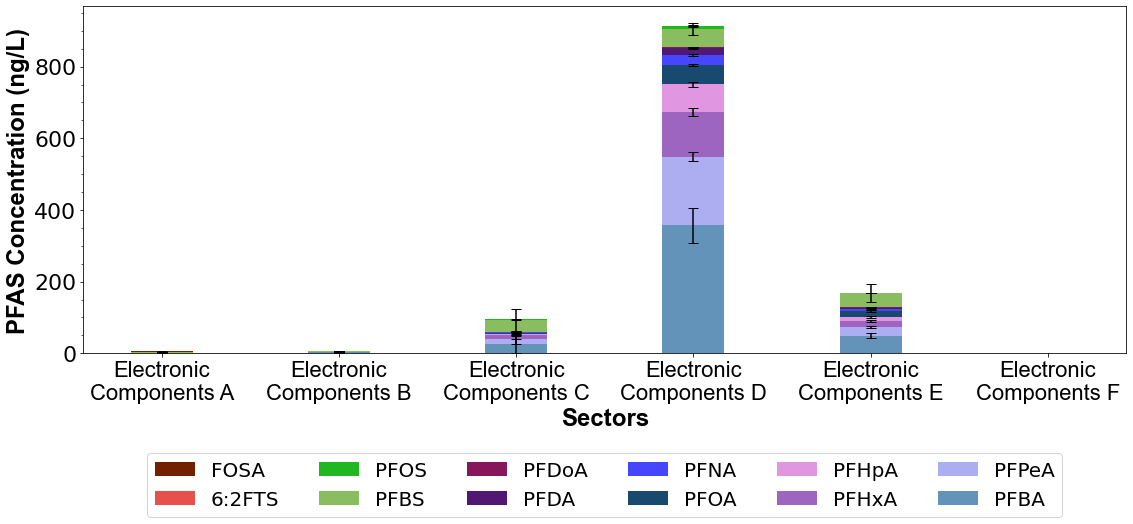

In [102]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


### PFAS Concentrations in the Metal Finishers Sector

#### Functions

In [129]:
def create_bar_chart(average_pivot, std_error_pivot, compound_colors_dict, title=None, xlabel=None, ylabel=None, figsize=(12, 6),
                     title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart with grouped and stacked bars, legend, and error bars, using a color dictionary.
    Args:
        average_pivot (pd.DataFrame): Pivot table with averages, PFAS Compound as rows, and Sector as columns.
        std_error_pivot (pd.DataFrame): Pivot table with standard errors, PFAS Compound as rows, and Sector as columns.
        compound_colors_dict (dict): Dictionary mapping PFAS compounds to colors.
        title (str, optional): Title for the chart.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    sectors = average_pivot.columns
    compounds = average_pivot.index
    #change to .35 for many columns or .2 for one column
    bar_width = 0.35
    x = np.arange(len(sectors))
    bottom = np.zeros(len(sectors))

    for compound in compounds:
        averages = average_pivot.loc[compound]
        std_errors = std_error_pivot.loc[compound]
        valid = ~(averages.isna() | (averages == 0))  # Filter out NaN or zero averages
        color = compound_colors_dict.get(compound, 'grey')  # Default color if not specified
        bars = ax.bar(x[valid], averages[valid], bar_width, label=compound, yerr=std_errors[valid], bottom=bottom[valid], capsize=5, color=color)
        bottom[valid] += averages[valid]


    def split_label(label, max_length=6):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        
        return '\n'.join(split_labels)
    ax.set_ylim(0, 400)  # Set y-axis from 0 to 400 #remove for one bar chart graphs
    ax.set_xticks(x)
    ax.set_xticklabels([split_label(sector) for sector in sectors], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)

    ax.set_xlabel(xlabel or 'Sectors', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(ylabel or 'Average Concentration', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or '', fontsize=title_fontsize, fontproperties=font_bold)
    
    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    ax.legend(handles=legend_handles[::-1], labels=legend_labels[::-1], loc='lower center',bbox_to_anchor=(0.5, -0.5),ncol=6, fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()

#### Filters and Settings

In [113]:
#filter_type (list of str, optional): List of 'Type' values to filter the data (default is None).
filter_type=['Outfall of Industry']
#filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
filter_qual_summary = ['Good','Probably Ok','Probably okay','Probably ok','']
#filter_sector (list of str, optional): List of 'Sector' values to filter the data (default is None).
filter_sector= ['Metal Finishing']
#filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= ['6:2 Fluorotelomersulfonic acid','Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluorododecanoic acid',
                       'Perfluoroheptanoic acid','Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)',
                       'Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid']
filter_location= ['Anodize Solutions','Davis Tool','FormFactor','JAE Oregon Inc','Lam Research Corp','Leupold & Stevens Inc','Lotus Applied Tech','Pioneer Metal Finishing',
                  'Quantum Global','Sheldon Manufacturing Inc','Tektronix Bldg 50','TTM','Westak']

#### Create Pivot Table for Average PFAS Compounds Concentrations at Various Industry Sectors

In [114]:
average_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'mean')
# Rename the index of data_df using the mapping (No need to change)
average_pivot.index = average_pivot.index.map(pfas_mapping)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in average_pivot.index]
# Reorder the DataFrame
average_pivot = average_pivot.loc[filtered_order]

# Dictionary mapping old column names to new names
rename_dict = {
      'Anodize Solutions':'Metal Finisher B', 
      'Davis Tool':'Metal Finisher C', 
      'FormFactor':'Metal Finisher D',
      'JAE Oregon Inc':'Metal Finisher E',
       'Lam Research Corp':'Metal Finisher F', 
       'Leupold & Stevens Inc':'Metal Finisher G', 
       'Lotus Applied Tech': 'Metal Finisher H',
       'Pioneer Metal Finishing': 'Metal Finisher I', 
       'Quantum Global': 'Metal Finisher J',
       'Sheldon Manufacturing Inc': 'Metal Finisher K', 
       'TTM': 'Metal Finisher M', 
       'Tektronix Bldg 50':'Metal Finisher L', 
       'Westak':'Metal Finisher N'
}

# Rename the columns
average_pivot.rename(columns=rename_dict, inplace=True)

average_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,0,0,0,24.266667,0,3.250000,4.3,1.30,5121.428571,0.0,10.05,17.225000,0.00
PFPeA,0,0,0,91.485714,0,1.440000,1.3,3.45,4503.714286,0.0,12.50,9.025000,0.00
PFHxA,0,0,0,426.428571,0,30.083333,NaN,1.20,3225.114286,0.0,12.50,18.875000,0.00
PFHpA,0,0,0,115.600000,0,0.775000,1.2,0.00,1758.421429,0.0,3.00,9.875000,0.00
PFOA,0,0,0,483.714286,0,5.950000,7.4,0.44,1054.828571,0.0,3.25,22.450000,0.00
PFNA,0,0,0,164.142857,0,3.516667,1.4,0.00,736.710000,0.0,0.65,1.675000,0.00
PFDA,0,0,0,263.714286,0,0.440000,1.2,0.00,210.814286,0.0,0.00,1.650000,0.00
PFDoA,0,0,0,53.585714,0,0.000000,1.4,0.00,18.835000,0.0,0.00,0.275000,0.00
PFBS,0,0,0,0.570000,0,4.500000,0.0,6.00,317.133333,NaN,3.70,7.613333,NaN


#### Create Pivot Table for Average Standard Deviation for PFAS Compounds Concentrations at Various Industry Sectors

In [115]:
std_dev_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'std')
# Rename the index of data_df using the mapping (No need to change)
std_dev_pivot.index = std_dev_pivot.index.map(pfas_mapping)
# Reorder the DataFrame
std_dev_pivot = std_dev_pivot.loc[filtered_order]

# Rename the columns
std_dev_pivot.rename(columns=rename_dict, inplace=True)

std_dev_pivot

Sample Location,Metal Finisher B,Metal Finisher E,Metal Finisher G,Metal Finisher I,Metal Finisher J,Metal Finisher M,Metal Finisher L
PFAS Compound,,,,,,,
PFBA,0.00000,31.462464,6.500000,1.838478,9617.675167,1.343503,28.606570
PFPeA,0.00000,81.200481,2.175546,4.879037,8525.903778,0.707107,5.499318
PFHxA,0.00000,394.656753,21.037720,1.697056,5776.911865,17.677670,16.645195
PFHpA,0.00000,114.301298,1.550000,0.000000,3106.598653,2.404163,9.496447
PFOA,0.00000,568.832053,5.040932,0.622254,1800.018639,4.596194,15.786387
PFNA,0.00000,296.595363,3.774873,0.000000,1241.862385,0.919239,2.150000
PFDA,0.00000,459.467342,0.983870,0.000000,410.151356,0.000000,1.989137
PFDoA,0.00000,72.194654,0.000000,0.000000,35.233577,0.000000,0.550000
PFBS,0.00000,0.723270,9.000000,8.485281,433.442659,5.232590,12.466296


####  Create Pivot Table for Count of PFAS Compounds Concentrations at Various Industry Sectors

In [116]:
count_pivot=create_custom_pivot(data_df, filter_type=filter_type, filter_qual_summary=filter_qual_summary, filter_sector=filter_sector, filter_pfas_compound=filter_pfas_compound,aggfunc = 'count')
# Rename the index of data_df using the mapping (No need to change)
count_pivot.index = count_pivot.index.map(pfas_mapping)

# Reorder the DataFrame
count_pivot = count_pivot.loc[filtered_order]

# Rename the columns
count_pivot.rename(columns=rename_dict, inplace=True)

count_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,2,1,1,6,1,4,1.0,2,7,1.0,2,4,1.0
PFPeA,2,1,1,7,1,5,1.0,2,7,1.0,2,4,1.0
PFHxA,2,1,1,7,1,6,NaN,2,7,1.0,2,4,1.0
PFHpA,2,1,1,7,1,4,1.0,2,7,1.0,2,4,1.0
PFOA,2,1,1,7,1,6,1.0,2,7,1.0,2,4,1.0
PFNA,2,1,1,7,1,6,1.0,2,7,1.0,2,4,1.0
PFDA,2,1,1,7,1,5,1.0,2,7,1.0,2,4,1.0
PFDoA,2,1,1,7,1,4,1.0,2,6,1.0,2,4,1.0
PFBS,2,1,1,6,1,4,1.0,2,6,NaN,2,3,NaN


#### Create Pivot Table for Standard Error of PFAS Compounds Concentrations at Various Industry Sectors

In [117]:
std_error_pivot=calculate_error_pivot(average_pivot, std_dev_pivot, count_pivot)
std_error_pivot

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher E,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher J,Metal Finisher K,Metal Finisher L,Metal Finisher M,Metal Finisher N
PFAS Compound,,,,,,,,,,,,,
PFBA,0.0,NaN,NaN,12.844497,NaN,3.250000,NaN,1.30,3635.139526,NaN,14.303285,0.95,NaN
PFPeA,0.0,NaN,NaN,30.690897,NaN,0.972934,NaN,3.45,3222.488729,NaN,2.749659,0.50,NaN
PFHxA,0.0,NaN,NaN,149.166232,NaN,8.588613,NaN,1.20,2183.467449,NaN,8.322597,12.50,NaN
PFHpA,0.0,NaN,NaN,43.201830,NaN,0.775000,NaN,0.00,1174.183923,NaN,4.748223,1.70,NaN
PFOA,0.0,NaN,NaN,214.998307,NaN,2.057952,NaN,0.44,680.343096,NaN,7.893193,3.25,NaN
PFNA,0.0,NaN,NaN,112.102510,NaN,1.541085,NaN,0.00,469.379862,NaN,1.075000,0.65,NaN
PFDA,0.0,NaN,NaN,173.662332,NaN,0.440000,NaN,0.00,155.022641,NaN,0.994569,0.00,NaN
PFDoA,0.0,NaN,NaN,27.287014,NaN,0.000000,NaN,0.00,14.384048,NaN,0.275000,0.00,NaN
PFBS,0.0,NaN,NaN,0.295274,NaN,4.500000,NaN,6.00,176.952225,NaN,7.197419,3.70,NaN


#### Create Bar Chart for Average PFAS Concentrations at Various Industry Sectors Showing Standard Error

In [118]:
average_pivot[['Metal Finisher B', 'Metal Finisher C', 'Metal Finisher D',
              'Metal Finisher F', 'Metal Finisher G','Metal Finisher H', 'Metal Finisher I',
              'Metal Finisher K', 'Metal Finisher M', 'Metal Finisher L','Metal Finisher N']]

Sample Location,Metal Finisher B,Metal Finisher C,Metal Finisher D,Metal Finisher F,Metal Finisher G,Metal Finisher H,Metal Finisher I,Metal Finisher K,Metal Finisher M,Metal Finisher L,Metal Finisher N
PFAS Compound,,,,,,,,,,,
PFBA,0,0,0,0,3.250000,4.3,1.30,0.0,10.05,17.225000,0.00
PFPeA,0,0,0,0,1.440000,1.3,3.45,0.0,12.50,9.025000,0.00
PFHxA,0,0,0,0,30.083333,NaN,1.20,0.0,12.50,18.875000,0.00
PFHpA,0,0,0,0,0.775000,1.2,0.00,0.0,3.00,9.875000,0.00
PFOA,0,0,0,0,5.950000,7.4,0.44,0.0,3.25,22.450000,0.00
PFNA,0,0,0,0,3.516667,1.4,0.00,0.0,0.65,1.675000,0.00
PFDA,0,0,0,0,0.440000,1.2,0.00,0.0,0.00,1.650000,0.00
PFDoA,0,0,0,0,0.000000,1.4,0.00,0.0,0.00,0.275000,0.00
PFBS,0,0,0,0,4.500000,0.0,6.00,NaN,3.70,7.613333,NaN


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

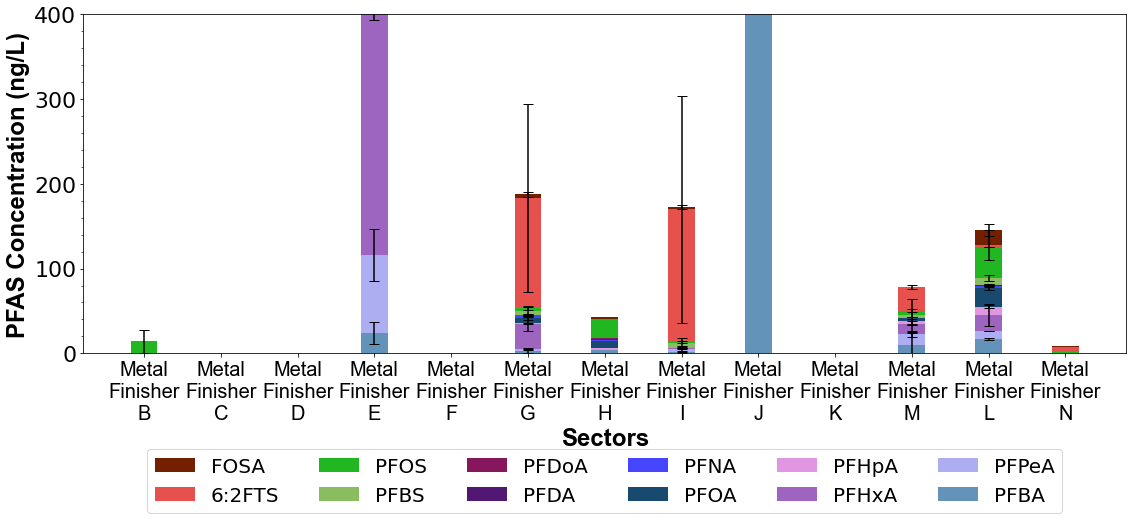

In [132]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=20, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\rodriguezc\Anaconda3\

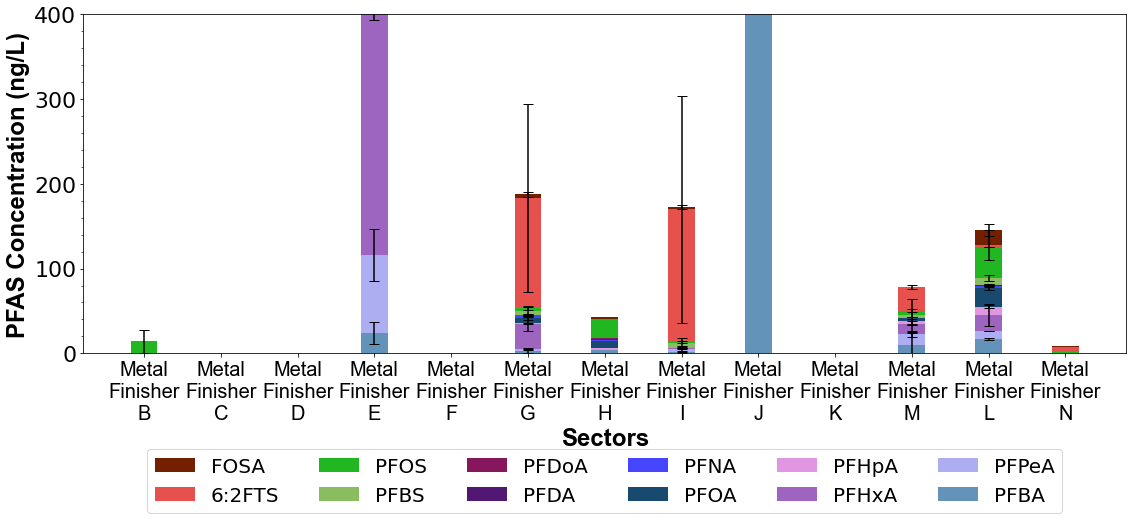

In [131]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(16, 8)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot, std_error_pivot, figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=20, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)


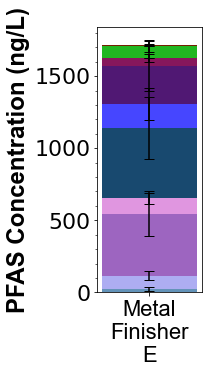

In [122]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Metal Finisher E']], std_error_pivot[['Metal Finisher E']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

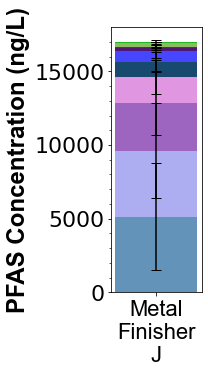

In [125]:
#figsize (tuple, optional): Figure size in inches (width, height). Default is (12, 6).
figsize=(3, 5)
#title (str, optional): Title for the chart. Default is None.
title=''
#xlabel (str, optional): Label for the x-axis. Default is None.
xlabel=''
#ylabel (str, optional): Label for the y-axis. Default is None.
ylabel='PFAS Concentration (ng/L)'

create_bar_chart(average_pivot[['Metal Finisher J']], std_error_pivot[['Metal Finisher J']], figsize=figsize, title=title, xlabel=xlabel, ylabel=ylabel, title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20, compound_colors_dict=compound_colors_dict_abbrev)

### PFAS Concentrations in ​Manholes by Contributing Land Use

#### Functions

In [228]:
def create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter,filter_pfas_compound=None):
    """
    Create a pivot table with specific filters, multi-level columns, and aggregation.

    Args:
        data_df (pd.DataFrame): The input dataframe containing the dataset.
        type_filter (list): A list of types to filter the 'Type' column.
        start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
        qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).

    Returns:
        pd.DataFrame: A pivot table based on the specified structure and filters.
    """
    # Convert 'Sample Date' to datetime format if not already
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])
    
    # Apply filters
    filtered_data = data_df[
        (data_df['Type'].isin(type_filter)) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        (data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter)) &
        (data_df['PFAS Compound'].isin(filter_pfas_compound))
    ]
    
    # Create pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='Quant Incl Estimates Incl Qual Flags',
        index='PFAS Compound',
        columns=['Dominant Contributor', 'Sample Location'],
        aggfunc='mean'
    )
    
    return pivot_table

In [229]:
def add_flow_row_to_pivot(pivot_df, flow_df):
    """
    Adds a new row with flow values to a given pivot table based on a mapping dataframe.

    Args:
        pivot_df (pd.DataFrame): The pivot table with PFAS compounds.
        flow_df (pd.DataFrame): The dataframe with flow information.

    Returns:
        pd.DataFrame: The updated pivot table with the added flow row.
    """
    # Create a mapping of Site to Predicted Flow from the flow dataframe
    flow_mapping = dict(zip(flow_df['Site'], flow_df['Predicted Flow (MGD)']))
    
    # Initialize a list to store flow values for each column in the pivot table
    flow_values = []

    # Iterate through the columns of the pivot table, which correspond to Sample Location
    for col in pivot_df.columns.levels[1]:  # Assuming the second level has 'Sample Location'
        # Get the flow value from the flow_mapping, if the column is in the mapping
        flow_value = flow_mapping.get(col, 0)  # Use 0 or NaN if the Site is not found
        flow_values.append(flow_value)

    # Add a new row for flow at the bottom of the pivot table
    # This assumes the pivot table has a MultiIndex on columns with 'Sample Location' on level 1
    flow_row = pd.DataFrame([flow_values], columns=pivot_df.columns, index=['Flow (MGD)'])

    # Append the new flow row to the pivot table
    updated_pivot_df = pd.concat([pivot_df, flow_row])

    return updated_pivot_df

In [230]:
def calculate_weighted_averages(pivot_table):
    # Make a copy of the pivot table to avoid changing the original data
    pivot_table_copy = pivot_table.copy()
    
    # Convert all non-numeric types to NaN
    for col in pivot_table_copy.columns:
        pivot_table_copy[col] = pd.to_numeric(pivot_table_copy[col], errors='coerce')

    # Separate the flows from the rest of the pivot table data
    flows = pivot_table_copy.iloc[-1]  # Last row for flows
    pfas_compounds = pivot_table_copy.iloc[:-1]  # All but last row for PFAS compounds
    
    # Initialize a DataFrame to hold the flow-weighted averages, with the same index as pfas_compounds
    flow_weighted_avg_df = pd.DataFrame(index=pfas_compounds.index)

    # Calculate the flow-weighted averages for each PFAS compound
    for contributor in pfas_compounds.columns.get_level_values(0).unique():
        # Create a Series to store the weighted average for the current contributor
        weighted_avg_series = pd.Series(index=pfas_compounds.index, dtype=float)
        
        # Loop over each PFAS compound
        for compound in pfas_compounds.index:
            # Concentrations of the current PFAS compound across all sample locations for the contributor
            compound_concentrations = pfas_compounds.loc[compound, (contributor, slice(None))]

            # Corresponding flow rates for the contributor across all sample locations
            contributor_flows = flows[(contributor, slice(None))]
            
            # Calculate the weighted average for the current PFAS compound
            weighted_average = np.nansum(compound_concentrations * contributor_flows) / np.nansum(contributor_flows)
            
            # Assign the weighted average to the correct entry in the series
            weighted_avg_series[compound] = weighted_average
        
        # Assign the series to the correct column in the final DataFrame
        flow_weighted_avg_df[contributor+'_Weighted-Flow Avg'] = weighted_avg_series

    return flow_weighted_avg_df

In [231]:
def calculate_StdError(pivot_table):
    # Make a copy of the pivot table to avoid changing the original data
    pivot_table_copy = pivot_table.copy()
    
    # Convert all non-numeric types to NaN
    for col in pivot_table_copy.columns:
        pivot_table_copy[col] = pd.to_numeric(pivot_table_copy[col], errors='coerce')

    # Separate the flows from the rest of the pivot table data
    flows = pivot_table_copy.iloc[-1]  # Last row for flows
    pfas_compounds = pivot_table_copy.iloc[:-1]  # All but last row for PFAS compounds
    
    # Initialize a DataFrame to hold the flow-weighted averages, with the same index as pfas_compounds
    Std_error_series_df = pd.DataFrame(index=pfas_compounds.index)

    # Calculate the flow-weighted averages for each PFAS compound
    for contributor in pfas_compounds.columns.get_level_values(0).unique():
        # Create a Series to store the weighted average for the current contributor
        Std_error_series = pd.Series(index=pfas_compounds.index, dtype=float)
        
        # Loop over each PFAS compound
        for compound in pfas_compounds.index:
            # Concentrations of the current PFAS compound across all sample locations for the contributor
            compound_concentrations = pfas_compounds.loc[compound, (contributor, slice(None))]
            
            # Calculate the weighted average for the current PFAS compound
            std_error = np.std(compound_concentrations, ddof=1)/np.sqrt(len(compound_concentrations))
            
            # Assign the weighted average to the correct entry in the series
            Std_error_series[compound] = std_error
        
        # Assign the series to the correct column in the final DataFrame
        Std_error_series_df[contributor+'_StdError'] = Std_error_series

    return Std_error_series_df



In [232]:
def create_pfas_bar_chart(data_df, contributors, title=None, figsize=(12, 8),colors=None, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    x = np.arange(len(data_df))  # the label locations

    # Loop through each specified contributor
    for i, contributor in enumerate(contributors):
        avg_col = f"{contributor}_Weighted-Flow Avg"
        err_col = f"{contributor}_StdError"
        print(f"Plotting {avg_col} with errors from {err_col}...")  # Debug statement
        # Plot bars with error bars
        ax.bar(x + i * bar_width - bar_width/2, data_df[avg_col], bar_width, label=contributor,color=colors.get(contributor, 'grey'),
               yerr=data_df[err_col], capsize=5)

    # Adding customizations
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'PFAS Concentrations by Compound and Contributor', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels(data_df.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.set_ylim(bottom=0)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'data_df' is the DataFrame with the correct columns
# contributors = ['Commercial and NSU Industrial', 'Domestic']
# create_pfas_bar_chart(data_df=data_df, contributors=contributors)





#### Filters and Settings

In [233]:
#qual_summary_filter (list): A list of values to filter the 'Qual Summary (Grade for filtering)' column.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','','Probably okay','Probably ok']

#start_date (str): The start date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
start_date='2023-06-06'

#end_date (str): The end date for filtering 'Sample Date' in 'YYYY-MM-DD' format.
end_date='2024-04-20'

#type_filter (list): A list of types to filter the 'Type' column.
type_filter=['Manhole']

filter_pfas_compound = ['Perfluorobutanoic acid','Perfluorobutanesulfonic acid','Perfluoropentanoic acid',
                        'Perfluoropentanesulfonic acid','Perfluorohexanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluoroheptanoic acid','Perfluorooctanoic acid (PFOA)','Perfluorooctanesulfonic acid (PFOS)',
                        'NMeFOSE','NEtFOSE','6:2 Fluorotelomersulfonic acid','Perfluorononanoic acid','Perfluorononanesulfonic acid',
                        'Perfluorodecanoic acid','Perfluorodecanesulfonic acid','Perfluoroundecanoic acid','Perfluorododecanesulfonic acid']

#### Create Pivot Table

In [234]:
pivot_table=create_custom_pivot_table(data_df, type_filter, start_date, end_date, qual_summary_filter,filter_pfas_compound)
# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)
#pivot_table.fillna('NS', inplace=True)
pivot_table

Dominant Contributor Commercial and NSU Industrial                             \
Sample Location                           MH#16331 MH#19788 MH#20615 MH#20723   
PFAS Compound                                                                   
6:2FTS                                       0.000    4.860    0.000   21.350   
NEtFOSE                                      0.000    0.000    0.000    0.000   
NMeFOSE                                        NaN    0.950    0.000    0.000   
PFBS                                         1.250    7.800    3.400    2.500   
PFBA                                         4.350    5.650    1.850    1.950   
PFDS                                         0.490    0.670    0.185    0.700   
PFDA                                         0.410    1.140    0.305    0.425   
PFDoS                                        0.215    0.775    0.215    0.000   
PFHpA                                        0.765    6.250    0.425    1.165   
PFHxS                                        2.100    3.750    1.200    1.250   
PFHxA                                        3.900   10.650    1.800    2.350   
PFNS                                         0.000    0.000    0.000    0.445   
PFNA                                         0.450    3.650    0.150    0.440   
PFOS                                         3.800   10.700    3.500   33.500   
PFOA                                         2.550   21.000    1.700    2.000   
PFPeS                                        0.000    0.520    0.165    0.000   
PFPeA                                        2.600   12.000    0.705    0.760   
PFUnA                                        0.000    0.345    0.000    0.000   

Dominant Contributor                   Domestic                   
Sample Location      MH#21070 MH#72360 MH#20788 MH#67882 MH#8402  
PFAS Compound                                                     
6:2FTS                  0.280    0.835    0.000    0.000   0.000  
NEtFOSE                11.500    0.000    0.000    1.400   0.950  
NMeFOSE                 0.000    0.000    1.600    0.000   3.800  
PFBS                    1.900    1.390    2.250    1.300   0.490  
PFBA                    3.550    6.900    1.950    0.600   1.550  
PFDS                    3.100    1.050    0.210    0.850   1.100  
PFDA                    0.000    0.360    0.740    0.000   0.195  
PFDoS                   0.285    0.165    0.000    0.325   0.000  
PFHpA                   1.350    2.950    0.825    0.340   0.835  
PFHxS                   4.800    0.800    4.600    1.600   2.400  
PFHxA                   6.650    5.850    2.700    0.000   2.550  
PFNS                    0.795    0.295    0.240    0.295   0.545  
PFNA                    0.635    0.440    0.380    0.115   0.165  
PFOS                    6.900    0.965    6.300    2.520   6.000  
PFOA                    4.050    2.800    2.700    0.740   2.950  
PFPeS                   0.190    0.000    0.700    0.000   2.750  
PFPeA                   4.850    7.050    1.395   28.300   0.440  
PFUnA                   0.000    0.000    0.240    0.000   0.000

#### Create Table for Flow Weighted Average for Industry 

In [235]:
#Import data on predicted flow for manholes
sheet_name = 'June 2023 MH and Ind Flows'

# Rows to skip at the beginning of the sheet (0-indexed)
skiprows = 0  # If the first row is the header, we don't skip any rows

# The number of rows to read, after the header row
nrows = 9  # Number of rows to read, not including the header

# Read the Excel file
MH_flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skiprows, nrows=nrows, header=0)

MH_flows_df.head()  # Display the first few rows of the DataFrame

,Site,Category,Permitted Industries from list,Predicted Flow (MGD),Total Flow Subtracting Permitted Industries,Unnamed: 5,Unnamed: 6
0,MH#19788,Commercial and NSU Industrial,NaN,0.10080,0.100800,NaN,NaN
1,MH#72360,Commercial and NSU Industrial,"Acumed, Genentech",0.15120,0.104851,NaN,NaN
2,MH#16331,Commercial and NSU Industrial,NaN,0.06624,0.066240,NaN,NaN
3,MH#20615,Commercial and NSU Industrial,NaN,0.07776,0.077760,NaN,NaN
4,MH#21070,Commercial and NSU Industrial,NaN,0.60912,0.609120,NaN,NaN


In [236]:
updated_pivot_table=add_flow_row_to_pivot(pivot_table, MH_flows_df)
updated_pivot_table

Dominant Contributor Commercial and NSU Industrial                    \
Sample Location                           MH#16331 MH#19788 MH#20615   
6:2FTS                                     0.00000   4.8600  0.00000   
NEtFOSE                                    0.00000   0.0000  0.00000   
NMeFOSE                                        NaN   0.9500  0.00000   
PFBS                                       1.25000   7.8000  3.40000   
PFBA                                       4.35000   5.6500  1.85000   
PFDS                                       0.49000   0.6700  0.18500   
PFDA                                       0.41000   1.1400  0.30500   
PFDoS                                      0.21500   0.7750  0.21500   
PFHpA                                      0.76500   6.2500  0.42500   
PFHxS                                      2.10000   3.7500  1.20000   
PFHxA                                      3.90000  10.6500  1.80000   
PFNS                                       0.00000   0.0000  0.00000   
PFNA                                       0.45000   3.6500  0.15000   
PFOS                                       3.80000  10.7000  3.50000   
PFOA                                       2.55000  21.0000  1.70000   
PFPeS                                      0.00000   0.5200  0.16500   
PFPeA                                      2.60000  12.0000  0.70500   
PFUnA                                      0.00000   0.3450  0.00000   
Flow (MGD)                                 0.06624   0.1008  0.07776   

Dominant Contributor                             Domestic                    
Sample Location       MH#20723 MH#21070 MH#72360 MH#20788 MH#67882  MH#8402  
6:2FTS                21.35000    0.280  0.83500  0.00000   0.0000  0.00000  
NEtFOSE                0.00000   11.500  0.00000  0.00000   1.4000  0.95000  
NMeFOSE                0.00000    0.000  0.00000  1.60000   0.0000  3.80000  
PFBS                   2.50000    1.900  1.39000  2.25000   1.3000  0.49000  
PFBA                   1.95000    3.550  6.90000  1.95000   0.6000  1.55000  
PFDS                   0.70000    3.100  1.05000  0.21000   0.8500  1.10000  
PFDA                   0.42500    0.000  0.36000  0.74000   0.0000  0.19500  
PFDoS                  0.00000    0.285  0.16500  0.00000   0.3250  0.00000  
PFHpA                  1.16500    1.350  2.95000  0.82500   0.3400  0.83500  
PFHxS                  1.25000    4.800  0.80000  4.60000   1.6000  2.40000  
PFHxA                  2.35000    6.650  5.85000  2.70000   0.0000  2.55000  
PFNS                   0.44500    0.795  0.29500  0.24000   0.2950  0.54500  
PFNA                   0.44000    0.635  0.44000  0.38000   0.1150  0.16500  
PFOS                  33.50000    6.900  0.96500  6.30000   2.5200  6.00000  
PFOA                   2.00000    4.050  2.80000  2.70000   0.7400  2.95000  
PFPeS                  0.00000    0.190  0.00000  0.70000   0.0000  2.75000  
PFPeA                  0.76000    4.850  7.05000  1.39500  28.3000  0.44000  
PFUnA                  0.00000    0.000  0.00000  0.24000   0.0000  0.00000  
Flow (MGD)             0.34704    0.108  0.60912  0.06192   0.1512  0.05904

#### Calculate Weighted Average

In [237]:
table=calculate_weighted_averages(pivot_table=updated_pivot_table)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in table.index]
# Reorder the DataFrame
table = table.loc[filtered_order]

table

,Commercial and NSU Industrial_Weighted-Flow Avg,Domestic_Weighted-Flow Avg
PFBA,4.785919,1.113228
PFPeA,4.979901,16.135053
PFHxA,5.018427,1.167460
PFHpA,2.338289,0.557725
PFOA,4.014576,1.665344
PFNA,0.686562,0.186138
PFDA,0.406859,0.210661
PFUnA,0.026568,0.054603
PFBS,2.332310,1.340423
PFPeS,0.065523,0.755820


#### Calculate Standard Error

In [238]:
table_error=calculate_StdError(pivot_table=updated_pivot_table)

desired_order = df['Abbrev'].tolist() 
# Filter desired_order to only include items that exist in df's index
filtered_order = [item for item in desired_order if item in table_error.index]
# Reorder the DataFrame
table_error = table_error.loc[filtered_order]

table_error

,Commercial and NSU Industrial_StdError,Domestic_StdError
PFBA,0.822032,0.400347
PFPeA,1.776883,9.131662
PFHxA,1.336663,0.876071
PFHpA,0.893571,0.163359
PFOA,3.081306,0.698737
PFNA,0.541563,0.081292
PFDA,0.153769,0.221441
PFUnA,0.057500,0.080000
PFBS,1.005070,0.508604
PFPeS,0.082890,0.825126


#### Combine Tables for Weighted and Standard Error

In [239]:
# Now, concatenate them side-by-side
combined_df = pd.concat([table, table_error], axis=1)
combined_df

,Commercial and NSU Industrial_Weighted-Flow Avg,Domestic_Weighted-Flow Avg,Commercial and NSU Industrial_StdError,Domestic_StdError
PFBA,4.785919,1.113228,0.822032,0.400347
PFPeA,4.979901,16.135053,1.776883,9.131662
PFHxA,5.018427,1.167460,1.336663,0.876071
PFHpA,2.338289,0.557725,0.893571,0.163359
PFOA,4.014576,1.665344,3.081306,0.698737
PFNA,0.686562,0.186138,0.541563,0.081292
PFDA,0.406859,0.210661,0.153769,0.221441
PFUnA,0.026568,0.054603,0.057500,0.080000
PFBS,2.332310,1.340423,1.005070,0.508604
PFPeS,0.065523,0.755820,0.082890,0.825126


#### Create Bar Chart for PFAS Concentration for Each Compound Comparing Commercial vs Domestic

In [243]:
def create_pfas_bar_chart(data_df, contributors, title=None, figsize=(12, 8), colors=None, 
                          title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    fig, ax = plt.subplots(figsize=figsize)
    num_contributors = len(contributors)
    bar_width = 0.35  # Width of each individual bar
    group_width = num_contributors * bar_width + (num_contributors - 1) * 0.1  # Total width of all bars including gaps
    x = np.arange(len(data_df))  # the label locations

    # Loop through each specified contributor
    for i, contributor in enumerate(contributors):
        avg_col = f"{contributor}_Weighted-Flow Avg"
        err_col = f"{contributor}_StdError"
        offset = (i * bar_width + i * 0.05) - group_width / 2 + bar_width / 2  # Calculating the offset for each bar group
        print(f"Plotting {avg_col} with errors from {err_col}...")  # Debug statement
        # Plot bars with error bars
        ax.bar(x + offset, data_df[avg_col], bar_width, label=contributor, color=colors.get(contributor, 'grey'),
               yerr=data_df[err_col], capsize=5)

    # Adding customizations
    ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'PFAS Concentrations by Compound and Contributor', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels(data_df.index, rotation=45, ha='right', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.set_ylim(bottom=0)  # Ensure the y-axis starts from zero
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    plt.tight_layout()
    plt.show()


Plotting Commercial and NSU Industrial_Weighted-Flow Avg with errors from Commercial and NSU Industrial_StdError...
Plotting Domestic_Weighted-Flow Avg with errors from Domestic_StdError...


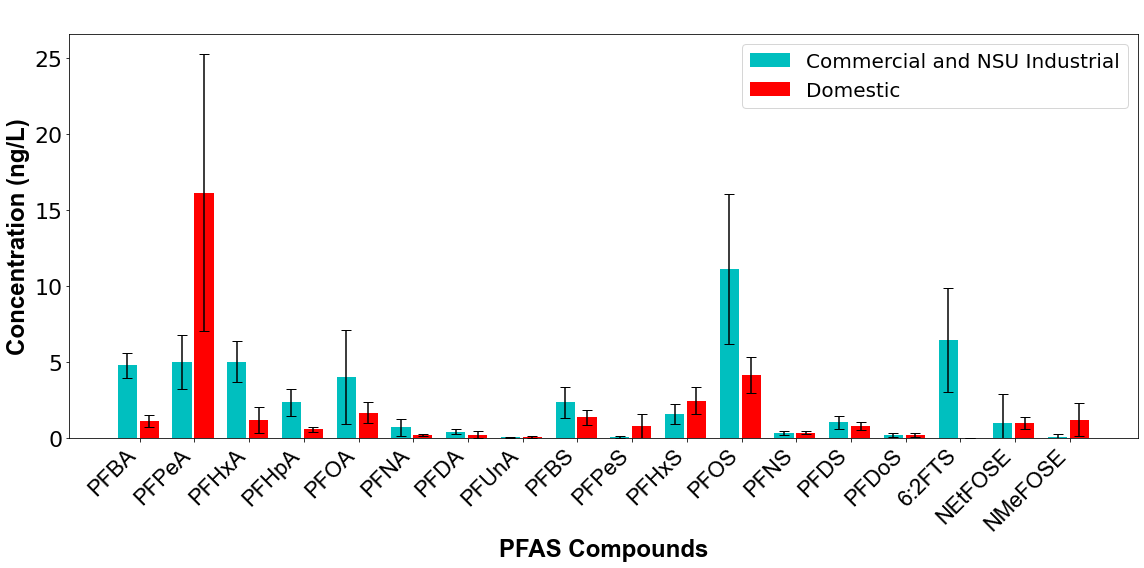

In [244]:
colors = {
    'Commercial and NSU Industrial': '#00BFBF',  # Blue color
    'Domestic': 'red'  # Red color
}
contributors = ['Commercial and NSU Industrial', 'Domestic']

create_pfas_bar_chart(data_df=combined_df,contributors=contributors, colors=colors, title=' ', figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20)


### Effects of Source Control Efforts – Mass Balance

#### Import Data

In [148]:
#Import data on predicted flow for manholes
sheet_name = 'Sector MB Summary'

# Rows to skip at the beginning of the sheet (0-indexed)
skiprows = 131  # If the first row is the header, we don't skip any rows

# The number of rows to read, after the header row
nrows = 8  # Number of rows to read, not including the header

# Read the Excel file
Sector_MassBalance_df = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skiprows, nrows=nrows, header=0)

Sector_MassBalance_df.drop('Unnamed: 0', axis=1, inplace=True)
Sector_MassBalance_df=Sector_MassBalance_df[['WRRF/Scenario','Domestic','Non-Domestic','Large Semiconductor','Landfill','Semiconductor & Metal Finisher Campus','Other Wet Industries']]
Sector_MassBalance_df

,WRRF/Scenario,Domestic,Non-Domestic,Large Semiconductor,Landfill,Semiconductor & Metal Finisher Campus,Other Wet Industries
0,Forest Grove WRRF,227.238467,64.121188,0.000000,0.000000,0.000000,50.703506
1,Hillsboro WRRF,247.425623,105.473981,0.000000,0.000000,0.000000,3.126554
2,Rock Creek 2019,1891.460997,628.980048,6856.772229,5445.150961,0.000000,2303.206993
3,Rock Creek 2020-2022,1891.460997,628.980048,87.202668,5445.150961,0.000000,2303.206993
4,Rock Creek March 2023,1898.079342,631.180890,87.202668,0.000000,0.000000,2303.206993
5,Rock Creek April 2023,1894.817158,630.096094,87.202668,1880.735457,0.000000,2303.206993
6,Durham 2019-2020,1197.093044,717.771200,0.000000,0.000000,4820.143102,5.648469
7,Durham 2021-2023,1197.093044,717.771200,0.000000,0.000000,372.167858,5.648469


In [159]:
def create_stacked_bar_chart(data_df, figsize=(12, 8),colors_dict=None, title=None, title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a stacked bar chart to compare PFAS concentrations across different scenarios.
    
    Args:
        data_df (pd.DataFrame): DataFrame with scenarios as rows and categories as columns.
        title (str, optional): Title for the chart.
        figsize (tuple, optional): Figure size in inches.
        title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize (int): Font sizes for the chart.
    """
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties

    font_bold = FontProperties(family='Arial', weight='bold')
    font_normal = FontProperties(family='Arial')
    
    # Setup the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    categories = data_df.columns[1:]  # Excluding the first column which contains the scenario names
    scenarios = data_df['WRRF/Scenario']
    x = np.arange(len(scenarios))  # Numeric indices for the x-axis positions
    width = 0.35  # Bar width

    # Function to split scenario labels if too long
    def split_label(label, max_length=10):
        if len(label) <= max_length:
            return label
        
        words = label.split()
        split_labels = []
        current_line = words[0]
        
        for word in words[1:]:
            # Check if adding the next word would exceed the max length
            if len(current_line) + len(word) + 1 > max_length:  # +1 for space
                split_labels.append(current_line)
                current_line = word
            else:
                current_line += ' ' + word
        
        # Append the last line
        split_labels.append(current_line)
        return '\n'.join(split_labels)

    # Bottom tracker for each bar stack
    bottom = pd.Series([0]*len(data_df))

    # Iterate over each category to plot
    for category in categories:
        color = colors_dict.get(category, 'grey')  # Default to grey if category not found in dictionary
        ax.bar(x, data_df[category], width, bottom=bottom, label=category, color=color)
        bottom += data_df[category]  # Update bottom height to stack the next bar on top

    # Adding customizations
    ax.set_xlabel(' ', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel('Total PFAS Mass Flux (mg/day)', fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_title(title or 'Total PFAS Mass by Scenario and Category', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xticks(x)
    ax.set_xticklabels([split_label(scenario) for scenario in scenarios], rotation=0, ha='center', fontsize=tick_label_fontsize, fontproperties=font_normal)
    ax.legend(fontsize=legend_fontsize, title_fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)

    # Add minor ticks on the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    plt.tight_layout()
    plt.show()


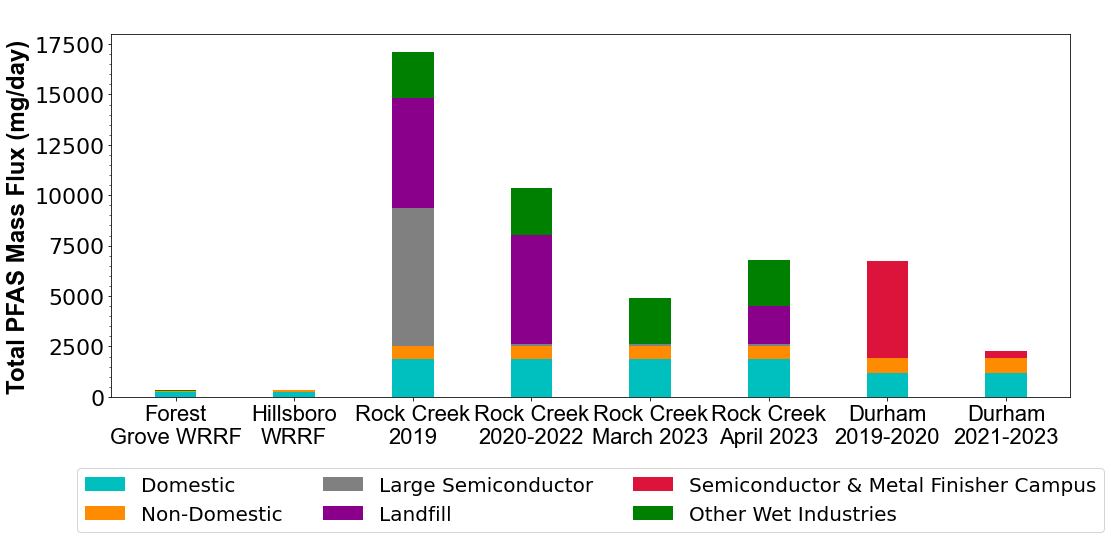

In [172]:
colors_dict = {
    'Domestic': '#00BFBF',  #good
    'Non-Domestic': '#FF8C00',  #good
    'Large Semiconductor': 'grey',  #good
    'Landfill': '#8B008B',  
    'Semiconductor & Metal Finisher Campus': '#DC143C',  
    'Other Wet Industries': '#008000'  # 
}

create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

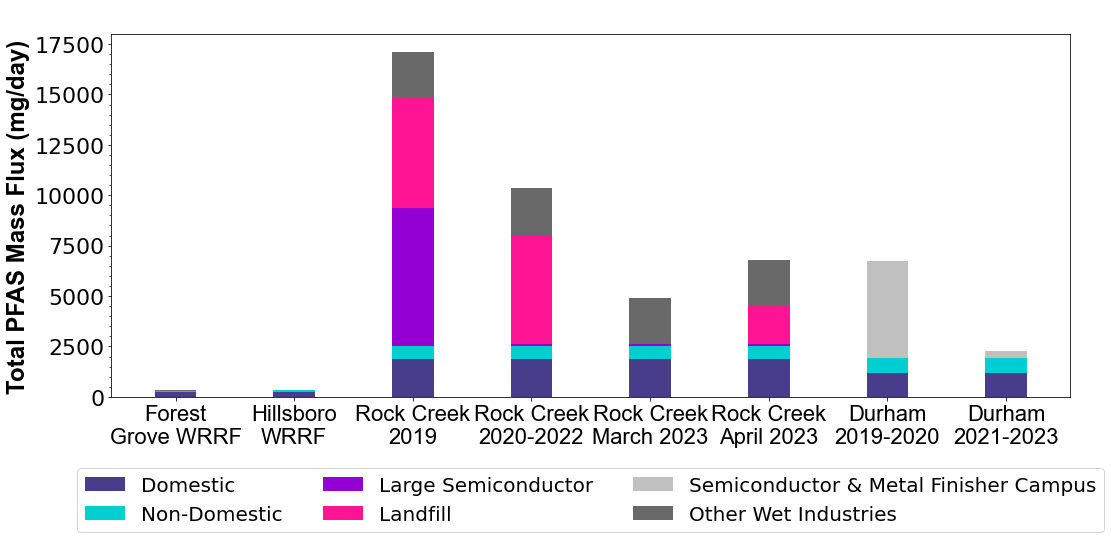

In [179]:
colors_dict = {
    'Domestic': '#483D8B',  
    'Non-Domestic': '#00CED1',  
    'Large Semiconductor': '#9400D3', 
    'Landfill': '#FF1493',  
    'Semiconductor & Metal Finisher Campus': '#C0C0C0',  
    'Other Wet Industries': '#696969'  # 
}

create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

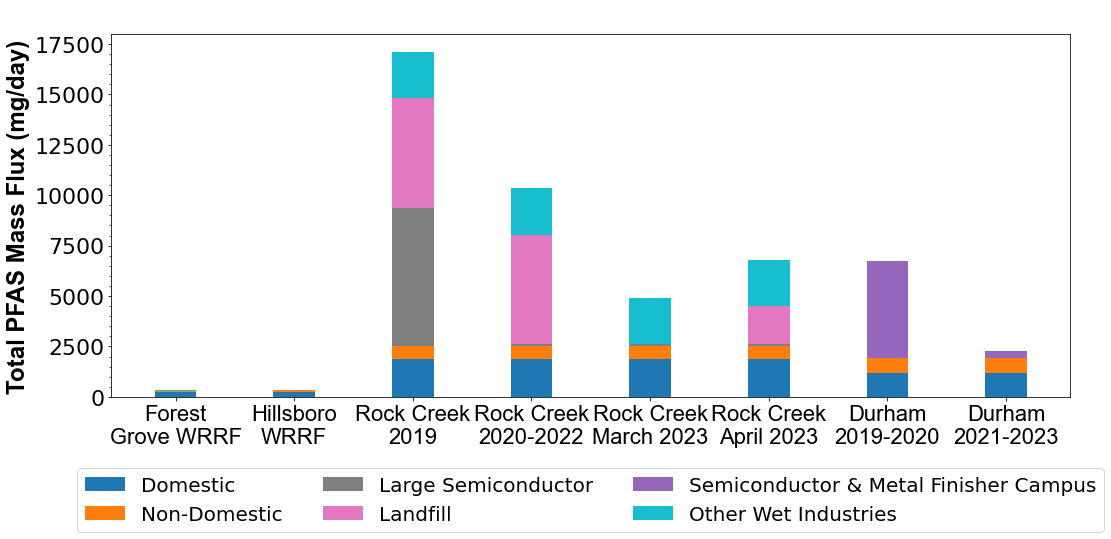

In [183]:
colors_dict = {
    'Domestic': '#1f77b4', 
    'Non-Domestic': '#ff7f0e',  #good
    'Large Semiconductor': '#7f7f7f',  #good
    'Landfill': '#e377c2',  
    'Semiconductor & Metal Finisher Campus': '#9467bd',  
    'Other Wet Industries': '#17becf'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

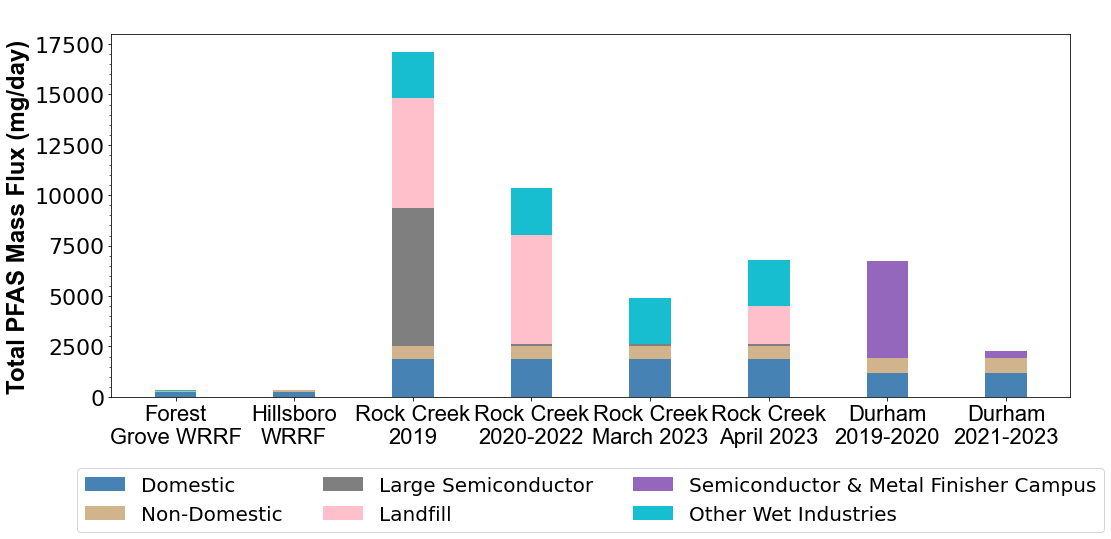

In [197]:
colors_dict = {
    'Domestic': '#4682B4', 
    'Non-Domestic': '#D2B48C',  #good
    'Large Semiconductor': '#7f7f7f',  #good
    'Landfill': '#FFC0CB',  
    'Semiconductor & Metal Finisher Campus': '#9467bd',  
    'Other Wet Industries': '#17becf'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

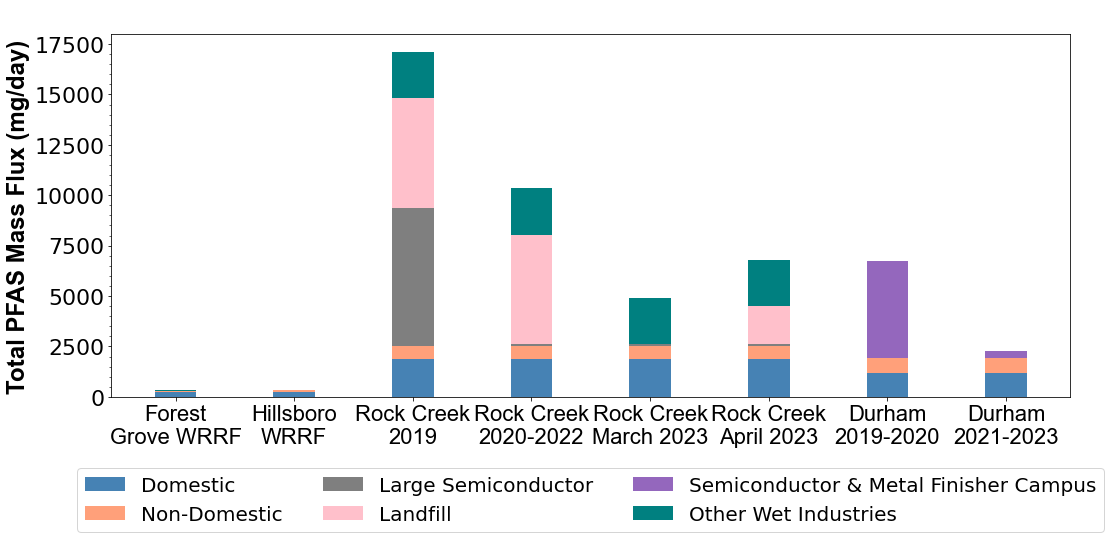

In [198]:
colors_dict = {
    'Domestic': '#4682B4', 
    'Non-Domestic': '#FFA07A',  #good
    'Large Semiconductor': '#7f7f7f',  #good
    'Landfill': '#FFC0CB',  
    'Semiconductor & Metal Finisher Campus': '#9467bd',  
    'Other Wet Industries': '#008080'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

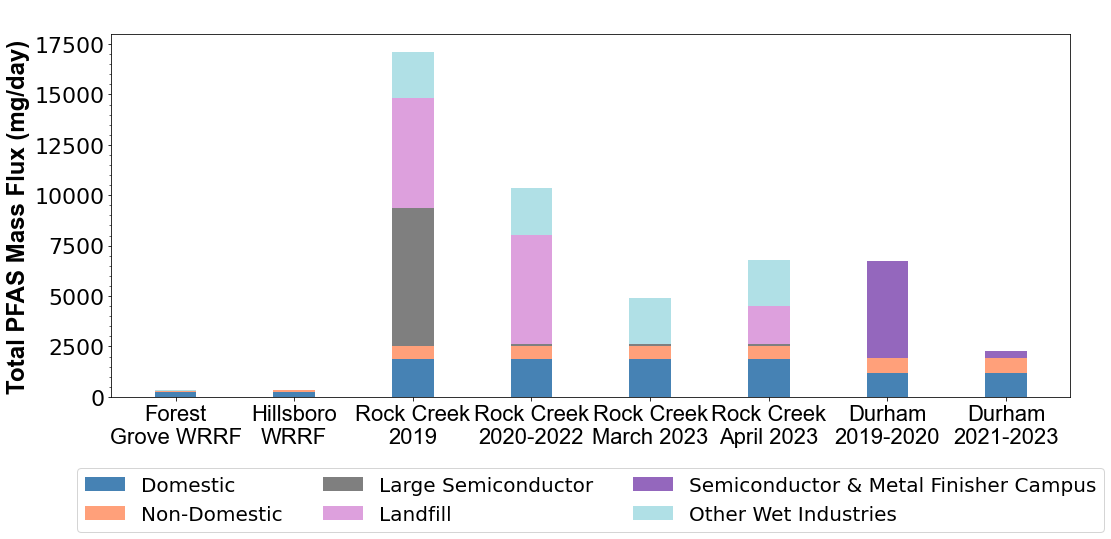

In [212]:
colors_dict = {
    'Domestic': '#4682B4', 
    'Non-Domestic': '#FFA07A',  #good
    'Large Semiconductor': '#7f7f7f',  #good
    'Landfill': '#DDA0DD',  
    'Semiconductor & Metal Finisher Campus': '#9467bd',  
    'Other Wet Industries': '#B0E0E6'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)

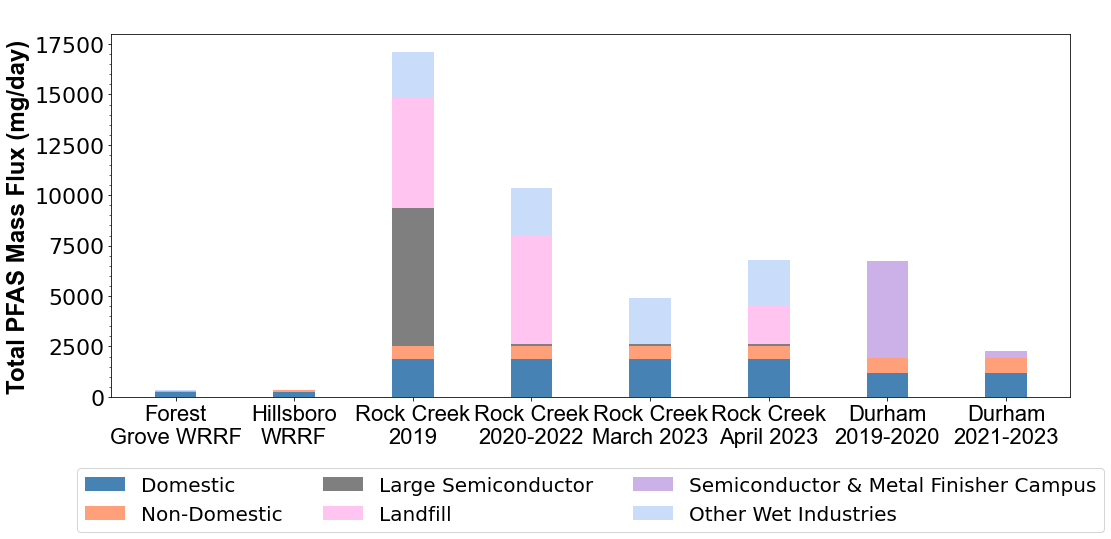

In [210]:
colors_dict = {
    'Domestic': '#4682B4', 
    'Non-Domestic': '#FFA07A',  
    'Large Semiconductor': '#7f7f7f',  
    'Landfill': '#ffc4ef',  
    'Semiconductor & Metal Finisher Campus': '#cbb1e7',  
    'Other Wet Industries': '#c9dcf9'  # 
}
create_stacked_bar_chart(data_df=Sector_MassBalance_df,colors_dict=colors_dict, title=' ',figsize=(16, 8), title_fontsize=30, axis_label_fontsize=24,
                  tick_label_fontsize=22, legend_fontsize=20)